In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [2]:
filename='./data/cow_data.csv'
cow_DF_origin=pd.read_csv(filename)

In [3]:
cow_DF_origin.head()

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,비고,결격사유 여부,종류,지역,Unnamed: 14
0,2021.07.23,1,서*호,48928970,암,550.0,3.0,580,360,363,목.배밑혹,1,큰소,경상남도 고성,NaN
1,2021.07.23,2,이*락,102112702,암,744.0,2.0,460,320,353,NaN,0,큰소,경상남도 고성,NaN
2,2021.07.23,3,문*종,156144852,암,1263.0,4.0,340,400,471,목이모색 상처,1,큰소,경상남도 고성,NaN
3,2021.07.23,4,문*종,136983661,암,1159.0,2.0,380,400,432,뒷다리약간절음,1,큰소,경상남도 고성,NaN
4,2021.07.23,5,이*만,138655532,암,1124.0,6.0,550,650,766,NaN,0,큰소,경상남도 고성,NaN


In [4]:
cow_DF=cow_DF_origin[['성별','중량','최저가','낙찰가','결격사유 여부','종류']]

In [5]:
cow_DF.head()

,성별,중량,최저가,낙찰가,결격사유 여부,종류
0,암,580,360,363,1,큰소
1,암,460,320,353,0,큰소
2,암,340,400,471,1,큰소
3,암,380,400,432,1,큰소
4,암,550,650,766,0,큰소


In [6]:
cow_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17448 entries, 0 to 17447
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   성별       17448 non-null  object
 1   중량       17448 non-null  int64 
 2   최저가      17448 non-null  int64 
 3   낙찰가      17448 non-null  int64 
 4   결격사유 여부  17448 non-null  int64 
 5   종류       17448 non-null  object
dtypes: int64(4), object(2)
memory usage: 818.0+ KB


In [7]:
cow_DF.describe(include='all')

,성별,중량,최저가,낙찰가,결격사유 여부,종류
count,17448,17448.000000,17448.000000,17448.000000,17448.000000,17448
unique,2,NaN,NaN,NaN,NaN,3
top,암,NaN,NaN,NaN,NaN,일반우
freq,14487,NaN,NaN,NaN,NaN,7655
mean,NaN,499.346114,669.672513,5122.761692,0.112391,NaN
std,NaN,173.233963,297.998572,5350.663271,0.315856,NaN
min,NaN,110.000000,0.000000,57.000000,0.000000,NaN
25%,NaN,310.000000,410.000000,460.000000,0.000000,NaN
50%,NaN,545.000000,560.000000,636.000000,0.000000,NaN
75%,NaN,634.000000,980.000000,10950.000000,0.000000,NaN


In [8]:
cow_DF['종류'].unique()

array(['큰소', '혈통우', '일반우'], dtype=object)

In [9]:
cow_DF['성별'].map({'암':0,'수':1})
cow_DF['종류'].map({'큰소':0,'혈통우':1,'일반우':2})

0        0
1        0
2        0
3        0
4        0
        ..
17443    2
17444    2
17445    2
17446    2
17447    2
Name: 종류, Length: 17448, dtype: int64

In [10]:
cow_DF['성별_N']=cow_DF['성별'].map({'암':0,'수':1})
cow_DF['종류_N']=cow_DF['종류'].map({'큰소':0,'혈통우':1,'일반우':2})

C:\Users\KDP-040\AppData\Local\Temp\ipykernel_14944\2586956060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_DF['성별_N']=cow_DF['성별'].map({'암':0,'수':1})
C:\Users\KDP-040\AppData\Local\Temp\ipykernel_14944\2586956060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_DF['종류_N']=cow_DF['종류'].map({'큰소':0,'혈통우':1,'일반우':2})


In [11]:
test_DF=cow_DF[['중량','최저가','낙찰가']]

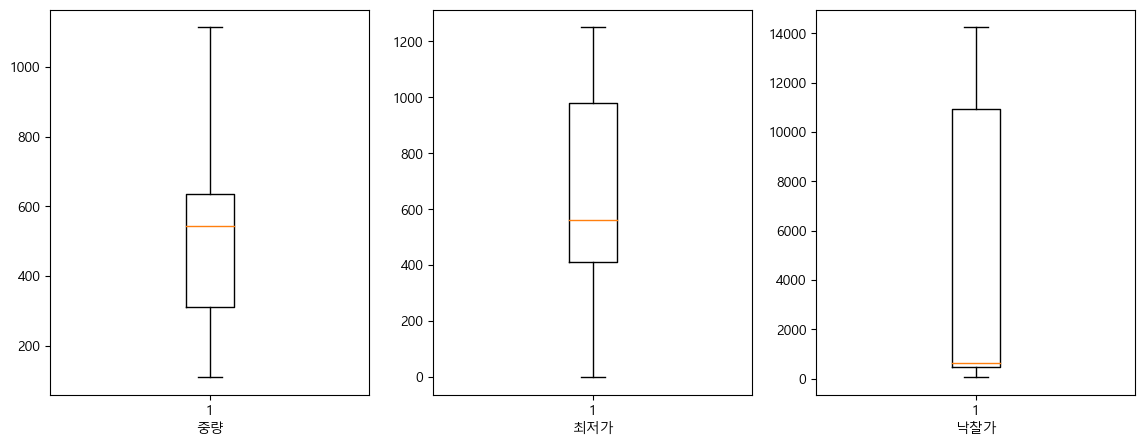

In [12]:
fig=plt.figure(figsize=(14,5))
cnt=1
for i in test_DF.columns:
    plt.subplot(1,3,cnt)
    plt.boxplot(test_DF[i])
    plt.xlabel(i)
    cnt+=1
    

In [13]:
# 데이터 전처리
# 최저가 0은 제거 필요
(test_DF['최저가']==0).sum()

2

In [14]:
DF=cow_DF[test_DF['최저가']!=0]

In [15]:
DF.corr(numeric_only=True)

,중량,최저가,낙찰가,결격사유 여부,성별_N,종류_N
중량,1.000000,0.768479,0.729095,-0.071168,-0.618653,0.406096
최저가,0.768479,1.000000,0.955033,-0.116901,-0.349993,0.806687
낙찰가,0.729095,0.955033,1.000000,-0.099505,-0.372359,0.883320
결격사유 여부,-0.071168,-0.116901,-0.099505,1.000000,0.018112,-0.087145
성별_N,-0.618653,-0.349993,-0.372359,0.018112,1.000000,-0.057106
종류_N,0.406096,0.806687,0.883320,-0.087145,-0.057106,1.000000


In [16]:
# 상관계수
DF.corr(numeric_only=True)['낙찰가']

중량         0.729095
최저가        0.955033
낙찰가        1.000000
결격사유 여부   -0.099505
성별_N      -0.372359
종류_N       0.883320
Name: 낙찰가, dtype: float64

<Axes: xlabel='중량', ylabel='낙찰가'>

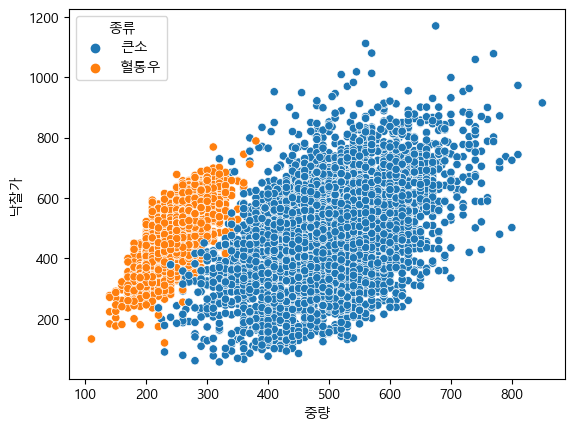

In [17]:
sns.scatterplot(x=DF[DF['종류_N']!=2]['중량'],y=DF[DF['종류_N']!=2]['낙찰가'],hue=DF[DF['종류_N']!=2]['종류'])

In [18]:
feature=DF[DF['종류_N']!=2][['중량','종류_N','성별_N']]
target=DF[DF['종류_N']!=2]['낙찰가']
feature.shape, target.shape

((9791, 3), (9791,))

In [19]:
feature=DF[DF['종류_N']!=2][['중량','종류_N','성별_N']]
target=DF[DF['종류_N']!=2]['낙찰가']
train_x,test_x,train_y,test_y=train_test_split(feature,target,test_size=0.2,random_state=0,stratify=DF[DF['종류_N']!=2]['종류'])
train_x.shape,train_y.shape

((7832, 3), (7832,))

In [20]:
# KNN모델
cowKNN=KNeighborsRegressor()

In [21]:
cowKNN.fit(train_x,train_y) #.to_frame()

KNeighborsRegressor()

In [22]:
cowKNN.score(train_x,train_y) #.to_frame()

0.25393366748168145

In [23]:
cowKNN.score(test_x,test_y) #.to_frame()

0.2044582443727354

In [24]:
# Linear
cowLi=LinearRegression()

In [25]:
cowLi.fit(train_x,train_y) #.to_frame()

LinearRegression()

In [26]:
cowLi.score(train_x,train_y) #.to_frame()

0.2913264236414823

In [27]:
cowLi.score(test_x,test_y) #.to_frame()

0.29200815249960177

In [28]:
cowLi.coef_,cowLi.intercept_

(array([  0.91578155, 151.03293573,  90.31048418]), 30.8855970561591)

In [29]:
# y = 4.98330916e-02*x1 -1.94040738e+02*x2-4.65058872e+01*x3+470.8494709900832
# '낙찰가','종류_N','성별_N'
# y = 0.2702475*x1 -236.86532994*x2-22.35120685*x3+370.85048892539135
y

NameError: name 'y' is not defined

In [ ]:
sns.scatterplot(x=feature.reshape(-1,1),y=target) #'낙찰가','종류_N','성별_N'

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [53]:
import itertools
def combi_list_(df,target_idx):
    combi_list=[]
    num_List=df.columns.to_list()
    num_List.remove(target_idx)
    for r in range(1,len(df.columns)):
        result=list(itertools.combinations(num_List,r))
        for i in result:
            combi_list.append(list(i))
    return combi_list


In [54]:
combi_list=combi_list_(DF[['결격사유 여부','중량','성별_N','종류_N','낙찰가']], '낙찰가')

In [55]:
for i in combi_list:
    feature=DF[i]
    target=DF['낙찰가']
    train_x,test_x,train_y,test_y=train_test_split(feature,target,test_size=0.2,random_state=0,stratify=DF['종류'])
    cowLi=LinearRegression()
    if train_x.shape[1]==0:
        cowLi.fit(train_x.to_frame(),train_y)
        train_score=cowLi.score(train_x.to_frame(),train_y) #.to_frame()
        test_score=cowLi.score(test_x.to_frame(),test_y) #.to_frame()
        print('-'*100)
        print(f'{i} train score : {train_score}, test score : test_score')
        print(cowLi.coef_,cowLi.intercept_)
    else:
        cowLi.fit(train_x,train_y)
        train_score=cowLi.score(train_x,train_y) #.to_frame()
        test_score=cowLi.score(test_x,test_y) #.to_frame()
        print('-'*100)
        print(f'{i} train score : {train_score}, test score : {test_score}')
        print(cowLi.coef_,cowLi.intercept_)

----------------------------------------------------------------------------------------------------
['결격사유 여부'] train score : 0.010085899588722969, test score : 0.009158245663332454
[-1702.47292684] 5312.682511500283
----------------------------------------------------------------------------------------------------
['중량'] train score : 0.5278458058077369, test score : 0.5463746267679905
[22.40422905] -6074.414023452802
----------------------------------------------------------------------------------------------------
['성별_N'] train score : 0.1377946315293871, test score : 0.1420583142906784
[-5297.11361267] 6017.52759572266
----------------------------------------------------------------------------------------------------
['종류_N'] train score : 0.7800658573578038, test score : 0.7810024775499526
[5507.61848591] -1079.6281088835558
----------------------------------------------------------------------------------------------------
['결격사유 여부', '중량'] train score : 0.5304351518558976, 

In [57]:
# ['결격사유 여부', '중량', '종류_N'] train score : 0.9438602123043393, test score : 0.9473849082487895
# [-121.56661754   13.6284786  4391.96723242] -6620.440988138456
# 낙찰가 = 11.40635661*중량 -1454.9950424*성별_N + 4541.33573146*종류_N -5445.740594611241
problem,weight,variety=map(int,(input('결격여부, 중량, 종류(큰소:0/혈통:1/:일반:2)를 입력해주세요.').split(',')))
bid_price=낙찰가 = -121.56661754*problem + 13.6284786*weight + 4391.96723242*variety -6620.440988138456
print(f'예상 낙찰가는 {bid_price}만원 입니다.')

예상 낙찰가는 1057.0792767415433만원 입니다.


In [62]:
bid_price

599.6284086887581

In [ ]:
# ['결격사유 여부', '중량', '성별_N', '종류_N'] train score : 0.9498612389810726, test score : 0.9526896804882974
# [ -142.47513959    11.39255198 -1457.48876968  4537.70859399] -5418.359297736781

weight,sex,variety,problem=map(int,(input('중량, 성별(암:0/수:1), 종류(큰소:0/혈통:1/:일반:2), 결격사유를 입력해주세요.').split(',')))
bid_price=낙찰가 = 11.39255198*weight -1457.48876968*sex + 4537.70859399*variety -142.47513959*problem -5418.359297736781
print(f'예상 낙찰가는 {bid_price}만원 입니다.')

In [64]:
11.39255198*weight -1457.48876968*0 + 4537.70859399*0 -142.47513959*1 -5418.359297736781

1046.8457110732188

In [32]:
from sklearn.utils import *
from sklearn.metrics import *
import warnings

In [58]:
# rets=all_estimators(type_filter='regressor')
# rets

In [59]:
preds_y = cowLi.predict(test_x)
mse=mean_squared_error(test_y,preds_y)
rmse=np.sqrt(mse)
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'Variance score : {r2_score(test_y,preds_y)}')

MSE : 1357649.5246385126, RMSE : 1165.182185170419
Variance score : 0.9526896804882974
